Action1	选择任意一张图片，对其进行灰度化，然后使用SVD进行图像的重构，当奇异值数量为原有的1%，10%，50%时，输出重构后的图像			1、完成代码，结果正确（10points）	

In [5]:
import numpy as np
from scipy.linalg import svd
from PIL import Image
import matplotlib.pyplot as plt

In [29]:
# 取前k个特征，对图像进行还原
def get_image_feature(s, k):
	# 对于S，只保留前K个特征值
	s_temp = np.zeros(s.shape[0])
	s_temp[0:k] = s[0:k]
	s = s_temp * np.identity(s.shape[0])#对角阵为1
	# 用新的s_temp，以及p,q重构A
	temp = np.dot(p,s)
	temp = np.dot(temp,q)
	plt.imshow(temp, cmap=plt.cm.gray, interpolation='nearest')
	plt.show()
	#print(A-temp)

In [49]:
# 加载256色图片
image = Image.open('./photo.jpg') 
A = np.array(image)# (H x W x C), [0, 255], RGB
print(A.shape)
print(A)

(878, 880, 3)
[[[185 205 204]
  [185 205 204]
  [185 205 204]
  ...
  [235 227 206]
  [235 227 206]
  [235 227 206]]

 [[185 205 204]
  [185 205 204]
  [185 205 204]
  ...
  [235 227 206]
  [235 227 206]
  [235 227 206]]

 [[185 205 204]
  [185 205 204]
  [185 205 204]
  ...
  [236 228 207]
  [236 228 207]
  [236 228 207]]

 ...

 [[ 73  70  65]
  [ 73  70  65]
  [ 73  70  65]
  ...
  [ 72  62  53]
  [ 72  62  53]
  [ 72  62  53]]

 [[ 73  70  65]
  [ 73  70  65]
  [ 73  70  65]
  ...
  [ 72  62  53]
  [ 72  62  53]
  [ 72  62  53]]

 [[ 73  70  65]
  [ 73  70  65]
  [ 73  70  65]
  ...
  [ 72  62  53]
  [ 72  62  53]
  [ 72  62  53]]]


In [51]:
A=A[:,:,2]

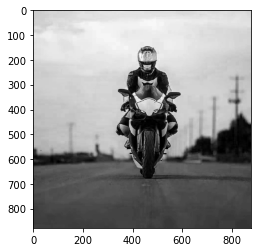

In [52]:
# 显示原图像
plt.imshow(A, cmap='gray')
#plt.imshow(A, cmap='gray', interpolation='nearest')
plt.show()

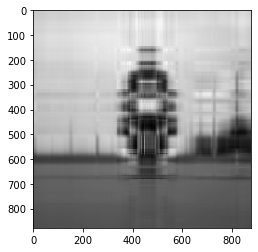

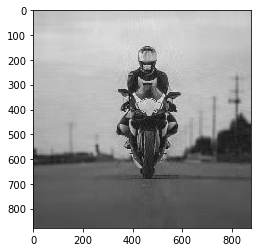

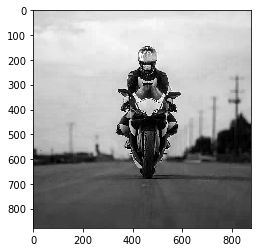

In [53]:
# 对图像矩阵A进行奇异值分解(SVD)，得到p,s,q
p,s,q = svd(A, full_matrices=0)
# 取前k个特征，对图像进行还原
get_image_feature(s, 5)
get_image_feature(s, 50)
get_image_feature(s, 500)